# Anomaly detection using Hidden Markov Models

To compare results between FPCA-BAYES and HMMs, we are going to run the Hidden Markov Models to perform prediction of trajectory first.

The notebook make use of hmmlearn library. Should we toss in Dirichlet prior?

In [1]:
import numpy as np 
from hmmlearn import hmm 
from matplotlib import pyplot as plt

np.random.seed(42)

We import data from trajectories.pyo

In [2]:
import pickle 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
# remove the mean component from y_vec 
y_mean = np.array(trajs['y_mean'])
del trajs
trajectory_file.close()
del trajectory_file

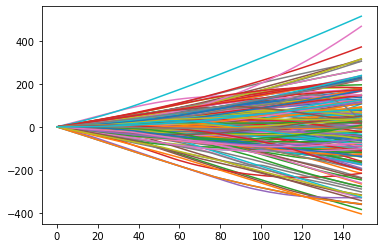

In [3]:
# prepare training data 
plt.figure()
num_of_instances = 150
training_data = y_vec.copy()
for i in range(training_data.shape[0]):
    training_data[i,:] = training_data[i,:] - y_mean
    plt.plot(training_data[i,:])
training_data = training_data[:num_of_instances].flatten().reshape((-1,1))
training_length = [y_vec[i].shape[0] for i in range(y_vec[:num_of_instances].shape[0])]

In [4]:
# start training the HMM model 
model = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)
# model.startprob_ = np.array([0.2, 0.2, 0.2])
# model.transmat_ = np.array([[0.7, 0.2, 0.1],
#                             [0.3, 0.5, 0.2],
#                             [0.3, 0.3, 0.4]])
# model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]]) # emission model
# model.covars_ = np.tile(np.identity(2), (3, 1, 1)) # emission model
model.fit(training_data, training_length)
model.monitor_

ConvergenceMonitor(
    history=[-142252.66754503988, -126124.74904959145, -119386.97510260963, -111595.48825276802, -105512.32959454747, -100018.2020617784, -95408.61233267999, -91981.76281061352, -90142.32359560576, -88533.02074321188, -86799.42553300956, -85812.67127370539, -85702.20113901421, -85653.8873344489, -85622.04260916058, -85594.7691036664, -85565.02841286495, -85544.3705429734, -85530.27232286402, -85520.44207860928, -85513.41588299784, -85508.28057992538, -85504.45928332492, -85501.57034594745, -85499.34617332483, -85497.58770461017, -85496.1341360772, -85494.8334003821, -85493.48702679547, -85491.68872240698, -85488.58916115794, -85484.19096871554, -85480.25485811525, -85477.21561836527, -85474.84249937882, -85472.92606842604, -85471.31239219713, -85469.88390817212, -85468.54368342637, -85467.20944203823, -85465.82858865993, -85464.41552637114, -85463.05864034974, -85461.85233424818, -85460.83500488263, -85459.99219943603, -85459.28003663273, -85458.62795105619, -85457.

Let's pick a sample trajectory and get the hidden state sequence

The score is -633.88


Text(0.5, 1.0, 'Hidden state sequence')

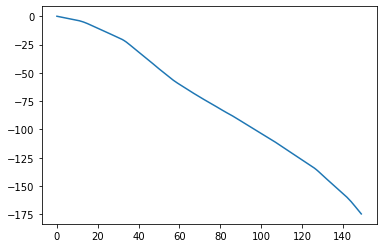

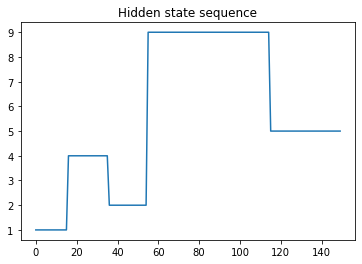

In [28]:
sample_trajectory = y_vec[3,:].copy() - y_mean
plt.figure()
plt.plot(sample_trajectory)
plt.figure()
hidden_states = model.predict(sample_trajectory.reshape(-1,1))
print('The score is {:.2f}'.format(model.score(sample_trajectory.reshape(-1,1))))
plt.plot(hidden_states)
plt.title('Hidden state sequence')

Snippet for sampling from the Markov chain

In [29]:
test_trajectory, test_hidden_sequence = model.sample(150)

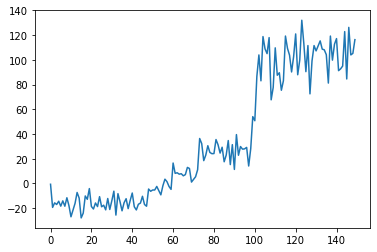

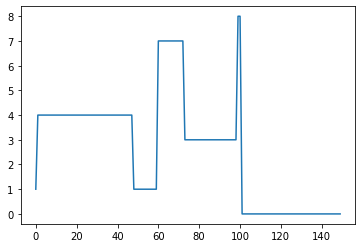

In [30]:
plt.figure()
plt.plot(test_trajectory)
plt.figure()
plt.plot(test_hidden_sequence)

## Calculate the scores from the dataset

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  3.,  7., 11., 25., 17.,
        29., 21., 23., 25., 16.,  8.,  7.]),
 array([-1029.05703086,  -996.03882994,  -963.02062903,  -930.00242812,
         -896.98422721,  -863.9660263 ,  -830.94782538,  -797.92962447,
         -764.91142356,  -731.89322265,  -698.87502174,  -665.85682082,
         -632.83861991,  -599.820419  ,  -566.80221809,  -533.78401717,
         -500.76581626,  -467.74761535,  -434.72941444,  -401.71121353,
         -368.69301261]),
 <BarContainer object of 20 artists>)

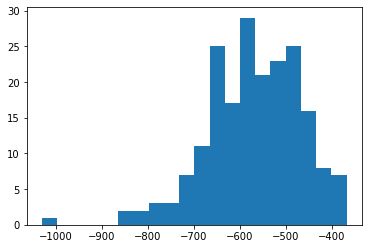

In [8]:
score_vec = np.zeros((200,))
for i in range(200):
    sample_trajectory = y_vec[i,:] - y_mean
    # hidden_states = model.predict(sample_trajectory.reshape(-1,1))
    score_vec[i] = model.score(sample_trajectory.reshape(-1,1))
plt.hist(score_vec, bins=20)

## Synthetic data anomaly detection test

In [16]:
test_trajectory = y_vec[3].copy() - y_mean
for i in range(50,150):
    test_trajectory[i] = test_trajectory[100] + 0.5 * (i-100)

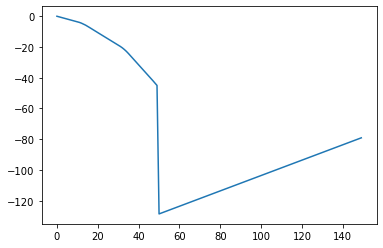

In [17]:
plt.plot(test_trajectory)

Text(0.5, 1.0, 'Hidden state sequence')

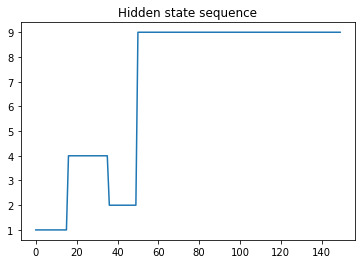

In [20]:
hidden_states = model.predict(test_trajectory.reshape(-1,1))
score, llh = model.score_samples(test_trajectory.reshape((-1,1)))
plt.plot(hidden_states)
plt.title('Hidden state sequence')

## Model analysis

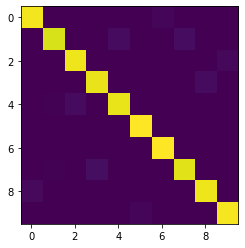

In [26]:
plt.imshow(model.transmat_)

In [31]:
model.means_

array([[ 100.46652336],
       [  -1.66157375],
       [ -37.22393318],
       [  26.89698331],
       [ -16.14152433],
       [-204.33712348],
       [ 197.55334211],
       [   8.0185144 ],
       [  55.77999887],
       [ -82.75732477]])

In [32]:
model.covars_

array([[[ 317.50133293]],

       [[   7.79369984]],

       [[  62.72627853]],

       [[  55.59878751]],

       [[  27.99136119]],

       [[4461.78841659]],

       [[4317.52745624]],

       [[  10.97442994]],

       [[  86.96828002]],

       [[ 356.25336432]]])